In [1]:
from fastai import *
from fastai.vision import *

In [2]:
import torchaudio as ta

In [3]:
DATA = Path('/home/zach/Data/FS2019/')

In [4]:
df = pd.read_csv(DATA/'sample_submission.csv')

In [5]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [24]:
lengths = []
for file in log_progress(df['fname'].tolist(), every=1):
    x, fs = ta.load(DATA/'test'/file)
    lengths.append(x.size(1))
    
df['lengths'] = lengths

In [5]:
from fastai_audio import *

In [7]:
%%time
for i in range(1000):
    a = open_audio(DATA/'test'/df['fname'][i])

CPU times: user 770 ms, sys: 157 ms, total: 927 ms
Wall time: 925 ms


In [8]:
%%time
for i in range(1000):
    a = open_audio(DATA/'test'/df['fname'][i])

CPU times: user 1.42 s, sys: 392 ms, total: 1.81 s
Wall time: 17.6 s


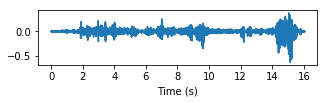

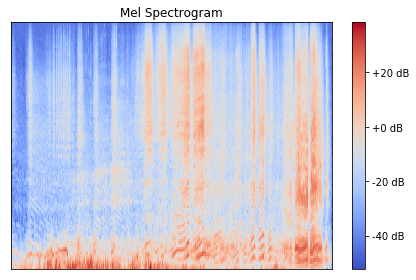

In [13]:
a.show()